This time, you need create a multilayer NN, which can learn a more difficult Pattern. After this task you should feel compfortable creating simple NNs with tensorflow and training them.

# Import Libraries

In [1]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create Data

In the Toy example, we have a two-dimensional data set: $(x_1,x_2) \in [-1,1] \times [-1,1]$. We want to train the network to output 1, if $x_1 + x_2 >= 1$. Otherwise, the network should output 0. Therefore, we are going to create a dataset with the corresponding labels. We furthermore divide the data into a training set and a test set.

In the following code, you do not need to do anything. However, you should understand what I am doing.

In [2]:
# Define total number of samples
tot_number_samples = 10000

# Create a dataset randomly and calculate the necessary labels
X = np.random.uniform(-1,1,(tot_number_samples,2))
y = ((X[:,0]*X[:,0] + X[:,1]*X[:,1] <= 0.1).astype(np.double) - (X[:,0]*X[:,0] + X[:,1]*X[:,1] <= 0.7).astype(np.double))*2+1

# Divide the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #25 % of data is in test set

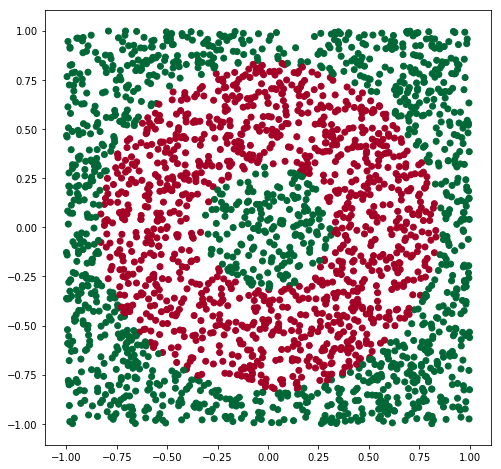

In [3]:
# Plot the test data in a graph for visualization
plt.figure(figsize=(8,8))

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap="RdYlGn")

plt.show()

# Build the Network

Similar to last time, create a NN with input and output vectors. But this time there are also hidden layers.

In [4]:
# Put you code here. Do not forget to define X and y as in Task 2.
n_input=2;
n_hidden=2;
# Labels
y = tf.placeholder(shape=[None], dtype=tf.float32, name="y") # Define y with tf.placeholder

# Input layer
X = tf.placeholder("float", shape=[None, 2]) # Define y with tf.placeholder
#X_2=tf.placeholder("float", shape=[2, 2])  
# Create weights and biases (with random initial values)
#W_1     = tf.Variable(tf.random_uniform(([2, 8]), -1.0 , 1.0)) # use tf.Variable. Shape: [2,1]
#W_2     = tf.Variable(tf.random_uniform(([8,8]), -1.0 , 1.0))
#W_3     = tf.Variable(tf.random_uniform(([8, 1]), -1.0 , 1.0))
#b_1     = tf.Variable(tf.zeros([8])) # use tf.Variable
#b_2     = tf.Variable(tf.zeros([8]))
#b_3     = tf.Variable(tf.zeros([1]))
# Define all other layers
# Create the output of the network
#a_1 = tf.nn.relu_layer(X*X,W_1,b_1)
#a_2 = tf.nn.relu_layer(a_1,W_2,b_2)
#a_out = tf.squeeze( (tf.matmul(a_2*a_2,W_3) + b_3) , [1], name="a_out" )

a_1     = tf.layers.dense(X*X,8,activation=tf.nn.relu,name="hidden_layer_1")
a_2     = tf.layers.dense(a_1,8,activation=tf.nn.relu,name="hidden_layer_2")
a_3     = tf.layers.dense(a_2,1,activation=tf.nn.tanh,name="output")

y_pred  = tf.squeeze(a_3,1)



In [5]:
y_pred

<tf.Tensor 'Squeeze:0' shape=(?,) dtype=float32>

# Define Loss and Accuracy Function

Define your own loss and accuracy function. You can also play around with the optimizer, if you wish.

In [11]:
loss               = tf.reduce_mean((y_pred-y)*(y_pred-y),name="loss" ) # Create a good loss function

y_pred_group       = tf.cast(y_pred>0.5,dtype=tf.float32,name="y_pred_group")
correct            = tf.equal(y_pred_group*2-1,y, name="correct")
#accuracy           = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
accuracy           = tf.cast(correct, tf.float32, name="accuracy")

#accuracy           = tf.metrics.accuracy(y_train,y)
                                
optimizer          = tf.train.AdamOptimizer()
training_optimizer = optimizer.minimize(loss, name="training_optimizer")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Train the Network

This is similar to the training in Task 2. The code has been adapted from here:
    
https://github.com/ageron/handson-ml

In [12]:
n_epochs                = 100
batch_size              = 128

n_iterations_per_epoch  = y_train.shape[0] // batch_size
n_iterations_validation = y_test.shape[0] // batch_size
best_loss_val           = np.infty

checkpoint_path = "./Task_3_network"

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        for iteration in range(n_iterations_per_epoch):
            X_batch = X_train[iteration*batch_size:(iteration+1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
            
            # Run the training operation and measure the loss:
            _, loss_train = sess.run(
                [training_optimizer, loss],
                feed_dict={X:X_batch, y: y_batch })

        # At the end of each epoch,
        # measure the validation loss and accuracy:
        loss_vals = []
        acc_vals = []
        for iteration in range(n_iterations_validation):
            X_batch = X_test[iteration*batch_size:(iteration+1)*batch_size,:]
            y_batch = y_test[iteration*batch_size:(iteration+1)*batch_size]
            loss_val, acc_val = sess.run(
                [loss, accuracy],
                feed_dict={X: X_batch,y: y_batch})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.mean(loss_vals)
        acc_val = np.mean(acc_vals)
        print("\rEpoch: {}  Val accuracy: {:.4f}%  Loss: {:.6f}{}".format(
            epoch+1, acc_val * 100, loss_val,
            " (improved)" if loss_val < best_loss_val else ""))

        # And save the model if it improved:
        if loss_val < best_loss_val:
            save_path = saver.save(sess, checkpoint_path)
            best_loss_val = loss_val

Epoch: 1  Val accuracy: 45.8882%  Loss: 0.936566 (improved)
Epoch: 2  Val accuracy: 45.8882%  Loss: 0.846916 (improved)
Epoch: 3  Val accuracy: 49.4243%  Loss: 0.722926 (improved)
Epoch: 4  Val accuracy: 59.7862%  Loss: 0.603742 (improved)
Epoch: 5  Val accuracy: 68.8734%  Loss: 0.522464 (improved)
Epoch: 6  Val accuracy: 76.0280%  Loss: 0.465730 (improved)
Epoch: 7  Val accuracy: 79.3997%  Loss: 0.423773 (improved)
Epoch: 8  Val accuracy: 81.6612%  Loss: 0.388875 (improved)
Epoch: 9  Val accuracy: 82.8947%  Loss: 0.354571 (improved)
Epoch: 10  Val accuracy: 83.9638%  Loss: 0.318260 (improved)
Epoch: 11  Val accuracy: 84.9507%  Loss: 0.281054 (improved)
Epoch: 12  Val accuracy: 85.6908%  Loss: 0.244846 (improved)
Epoch: 13  Val accuracy: 86.6776%  Loss: 0.209090 (improved)
Epoch: 14  Val accuracy: 87.0888%  Loss: 0.182908 (improved)
Epoch: 15  Val accuracy: 87.8701%  Loss: 0.162412 (improved)
Epoch: 16  Val accuracy: 89.6382%  Loss: 0.146173 (improved)
Epoch: 17  Val accuracy: 90.7072%

If everything works correctly, the Loss function should be smaller than 0.1. TODO: The accuracy is not working properly. Can you fix it?

# Prediction

In [9]:
with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    y_pred_value = sess.run(
            [y_pred],
            feed_dict={X: X_test,
                       y: np.zeros((X_test.shape[0]), dtype=np.float32)})
    y_pred_value = y_pred_value[0]

INFO:tensorflow:Restoring parameters from ./Task_3_network


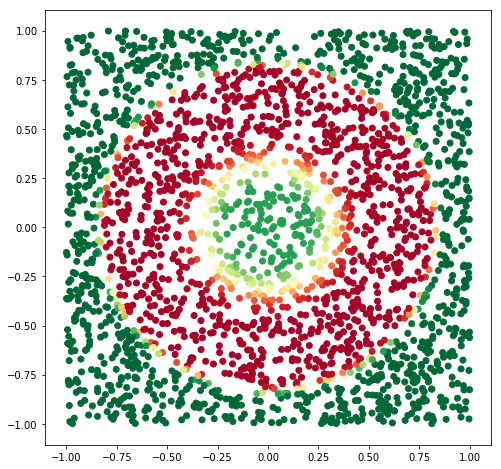

In [10]:
# Plot the test data in a graph for visualization
plt.figure(figsize=(8,8))

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_value,cmap="RdYlGn")

plt.show()

In [13]:
# This command should output something very close to [-1,1]. Otherwise there was no convergence.
print([np.min(y_pred_value),np.max(y_pred_value)])


[-0.999989, 1.0000001]
